# Results

This Notebook visualizes the results gathered from the tests.

#### Loading data

In [48]:
import numpy as np
from os import path

import warnings
warnings.filterwarnings('ignore')

data_path = 'data/'

data = {}

data['epochs'] = np.arange(5, 105, 5)

netnames = ['Resnet', 'Mobilenet', 'VGG', 'Densenet']
percentage_strings = ['010', '030', '050']
selectors = ['Glister', 'K-Centers', 'Random']
percentages = [10, 30, 50, 100]

for netname in netnames:

    frac_dict = {}
    
    filename = '100_{}'.format(netname.lower())
    frac_dict[100] = np.loadtxt(data_path+filename+'_subset.csv')
    
    for percentage_string in percentage_strings:
        frac = int(percentage_string)
        
        sel_dict = {}
        for selector in selectors:
            filename = '{}_{}_{}'.format(percentage_string, netname.lower(), selector.lower())

            sel_dict[selector.lower()] = np.loadtxt(data_path+filename+'_subset.csv')
            
        frac_dict[frac] = sel_dict
    
    data[netname.lower()] = frac_dict

## Visualization

In [49]:
import matplotlib

matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'font.size': 14,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib import pyplot as plt

In [77]:
def plot_accuracies_per_epoch(selector):
    
    percentages = [10, 30, 50]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    fig.suptitle(selector)
    fig.tight_layout()

    names = np.reshape(netnames, (2, 2))
    
    for row in range(2):
        for col in range(2):
            axes[row][col].set_title(names[row][col])
            axes[row][col].set_xlabel('Epochs')
            axes[row][col].set_ylabel('Accuracy')
            axes[row][col].set_autoscaley_on(False)
            axes[row][col].set_ylim([0.1, 0.9])

            axes[row][col].plot(data['epochs'], data[names[row][col].lower()][100], label="100\%")

            for percentage in percentages:
                axes[row][col].plot(data['epochs'], data[names[row][col].lower()][percentage][selector.lower()], label=str(percentage) + '\%')

            axes[row][col].label_outer()
            axes[row][col].legend()
            axes[row][col].grid()
            
    plt.savefig('epochs_{}'.format(selector.lower())+'.eps')

#### GLISTER

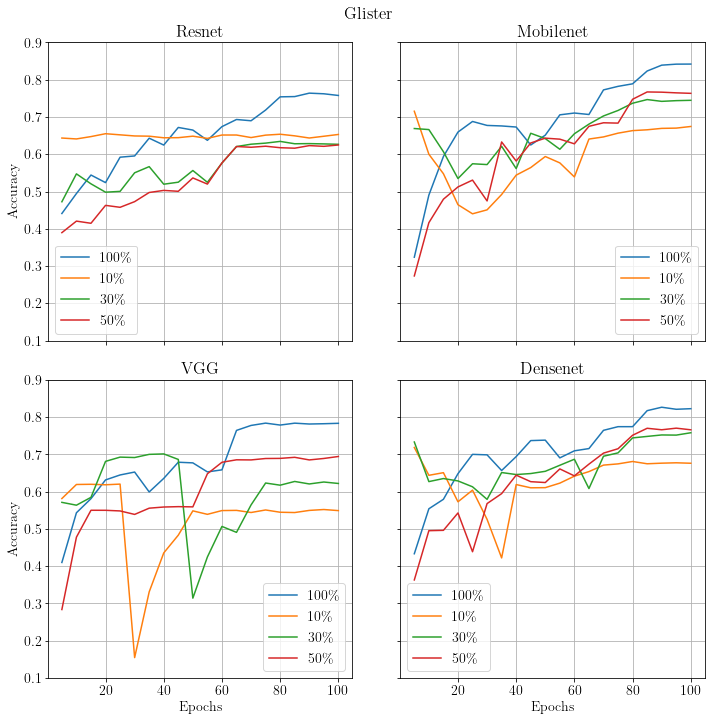

In [78]:
plot_accuracies_per_epoch('Glister')

#### K-Centers

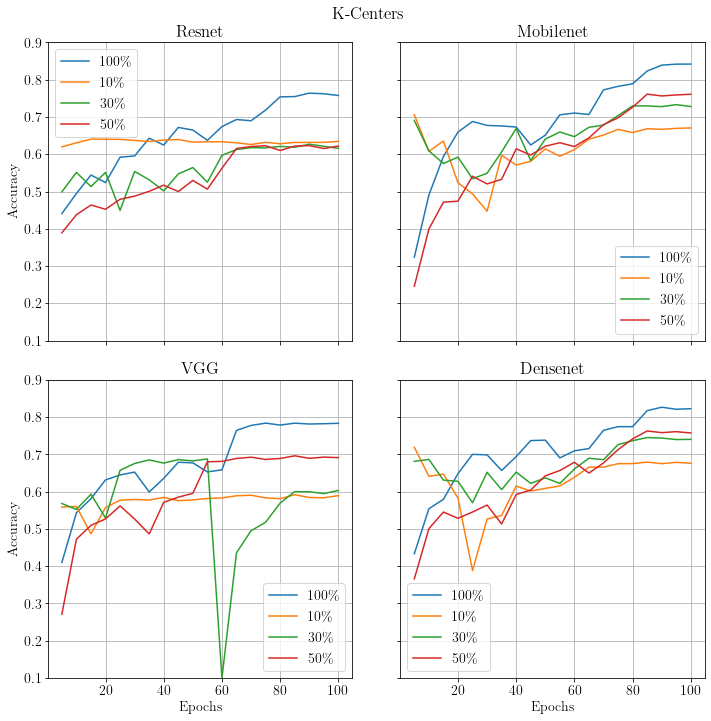

In [79]:
plot_accuracies_per_epoch('K-Centers')

#### Random

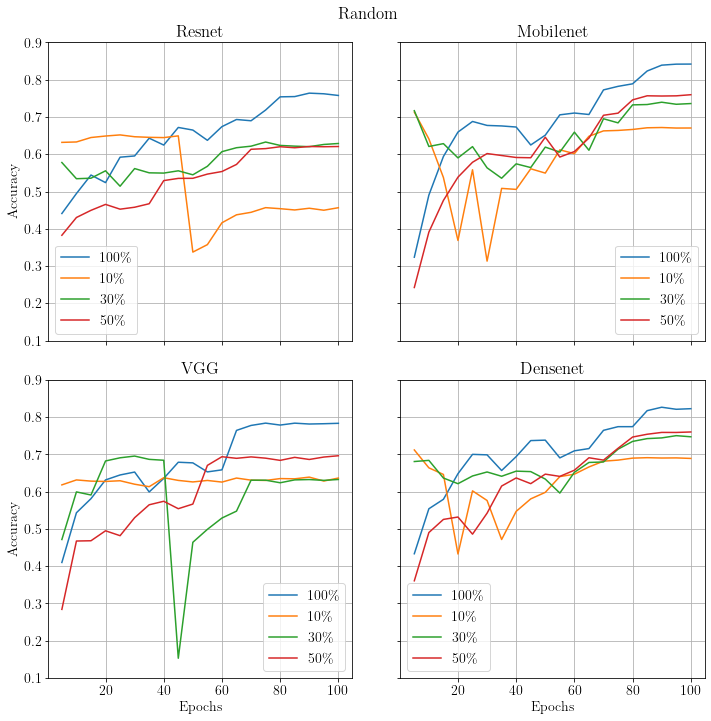

In [80]:
plot_accuracies_per_epoch('Random')

#### Accuracy comparison over dataset percentage    

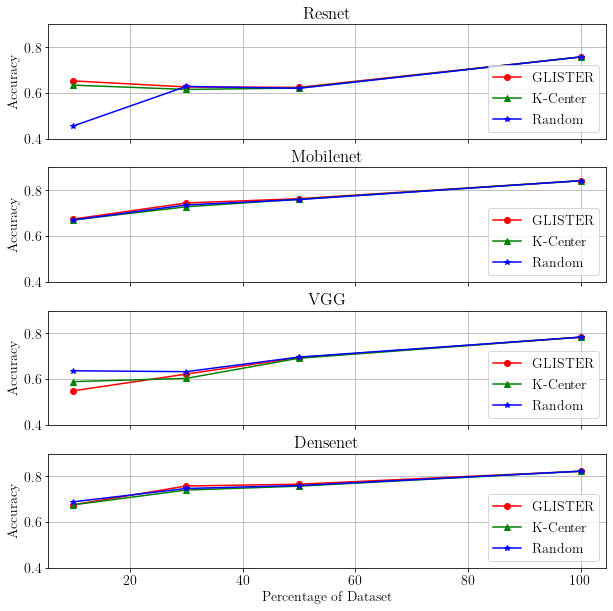

In [71]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, hspace=0.25)

axes = gs.subplots(sharex=True, sharey=True)

names = np.array(netnames)

for i, name in enumerate(names):
    glister = []
    kcenter = []
    random  = []

    for percentage in percentages[:3]:

        glister.append(data[name.lower()][percentage]['glister'][-1])
        kcenter.append(data[name.lower()][percentage]['k-centers'][-1])
        random.append(data[name.lower()][percentage]['random'][-1])

    # add entry of full dataset to list
    acc_full_data = data[name.lower()][100][-1]
    glister.append(acc_full_data)
    kcenter.append(acc_full_data)
    random.append(acc_full_data)

    axes[i].plot(percentages, glister, label='GLISTER', color='red', marker='o')
    axes[i].plot(percentages, kcenter, label='K-Center', color='green', marker='^')
    axes[i].plot(percentages, random, label='Random', color='blue', marker='*')
    axes[i].set_title(name)
    axes[i].set_xlabel('Percentage of Dataset')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_autoscaley_on(False)
    axes[i].set_ylim([0.4, 0.9])

    axes[i].label_outer()
    axes[i].legend()
    axes[i].grid()
    
    axes[i].label_outer()
    
plt.savefig('accuracy_over_nets.eps', bbox_inches= 'tight')